In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(Seurat)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
library(ggplot2)
library(ggpubr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
adata.R = readRDS('/home/ssobti/projects/mir_tud/101423_filtered_data/tRF_normalized_integrated_seurat.rds')
adata.R <- CellCycleScoring(adata.R, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
## keep cells of tRFs used in wet lab vaidation
adata.R <- subset(adata.R, subset = guide %in% c('tRNA-Cys-GCA-4-1.2t', 'tRNA-Gly-TCC-(6)2-1.2t', 'tRNA-Gln-TTG-(3)3-1.2t', 'tRNA-Arg-CCT-3-1.lh', 'tRNA-Arg-ACG-(3)1-1.2t'))
adata.R <- RunPCA(adata.R, features = c(s.genes, g2m.genes))
adata.R <- RunUMAP(adata.R, reduction = 'pca', dims = 1:50, seed.use = 1)
Total_RNA = colSums(adata.R@assays$RNA@counts)
Total_RNA = (Total_RNA-mean(Total_RNA))/sd(Total_RNA)
adata.R@meta.data$TotalRNA = Total_RNA

Warning message:
“The following features are not present in the object: MCM5, PCNA, TYMS, MCM2, MCM4, RRM1, UNG, GINS2, MCM6, CDCA7, PRIM1, UHRF1, MLF1IP, HELLS, RFC2, RPA2, NASP, GMNN, WDR76, SLBP, UBR7, POLD3, MSH2, RAD51, CDC45, TIPIN, DSCC1, BLM, CASP8AP2, USP1, CHAF1B, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: CKS1B, TMPO, FAM64A, ANP32E, HN1, RANGAP1, ECT2, LBR, CTCF, CBX5, not searching for symbol synonyms”
Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 41 features requested have not been scaled (running reduction without them): MCM5, PCNA, TYMS, MCM2, MCM4, RRM1, UNG, GINS2, MCM6, CDCA7, PRIM1, UHRF1, MLF1IP, HELLS, RFC2, RPA2, NASP, GMNN, WDR76, SLBP, UBR7, POLD3, MSH2, RAD51, CDC45, TIPIN, DSCC1, BLM, CASP8AP2, USP1, CHAF1B, CKS1B, TMPO, FAM64A, ANP32E, HN1, RANGAP1, ECT2, LBR, CTCF, CBX5”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're com

In [68]:
## save df for submission -- contains data for both UMAPs used below (1 and 3)
cc_umap_df = cbind(adata.R@reductions$umap@cell.embeddings, Phase = adata.R@meta.data$Phase, tRF = adata.R@meta.data$guide)
cc_umap_df = as.data.frame(cc_umap_df)
colnames(cc_umap_df) = c('UMAP1', 'UMAP2', 'Phase', 'tRF')
cc_umap_df$UMAP1 = as.numeric(cc_umap_df$UMAP1)
cc_umap_df$UMAP2 = as.numeric(cc_umap_df$UMAP2)
saveRDS(cc_umap_df, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/cc_umap_df.rds')

## save adata.R
saveRDS(adata.R, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/cc_adata_R.rds')

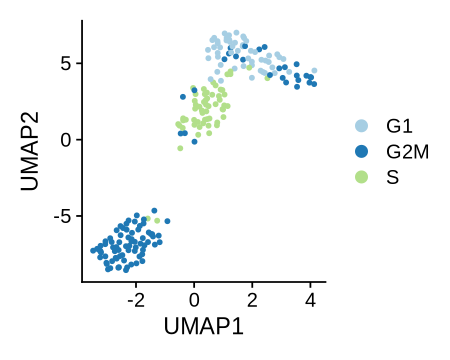

In [ ]:
wfix = 3.75
hfix = 3
options(repr.plot.width = wfix, repr.plot.height = hfix)
DimPlot(adata.R, reduction = 'umap') + theme(plot.title = element_blank()) + xlab('UMAP1') + ylab('UMAP2') + scale_color_brewer(palette = "Paired") + 
theme(margin(0,0,0,0, unit = "cm"), axis.text = element_text(family = "Helvetica"), axis.title = element_text(family = "Helvetica"), legend.text = element_text(family = "Helvetica"), legend.title = element_text(family = "Helvetica"))
#ggsave('~/projects/mir_tud/notebooks/cellcycle/tRF/tRF_cc_umap_cycle_labels.pdf', width = wfix, height = hfix)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


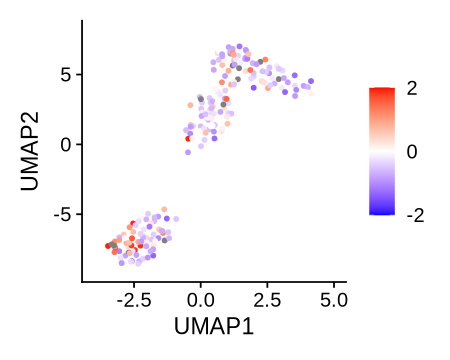

In [ ]:
wfix = 3.75
hfix = 3
options(repr.plot.width = wfix, repr.plot.height = hfix)
FeaturePlot(adata.R, reduction = 'umap', features = 'TotalRNA') + 
    scale_color_gradient2(low = 'blue', high = 'red', limits = c(-2, 2), breaks = c(-2, 0, 2)) + 
    theme(plot.title = element_blank()) + 
    xlab('UMAP1') + ylab('UMAP2') +
    theme(margin(0,0,0,0, unit = "cm"), axis.text = element_text(family = "Helvetica"), axis.title = element_text(family = "Helvetica"), legend.text = element_text(family = "Helvetica"), legend.title = element_text(family = "Helvetica"))
#ggsave('~/projects/mir_tud/notebooks/cellcycle/tRF/tRF_cc_umap_total_RNA.pdf', width = wfix, height = hfix)


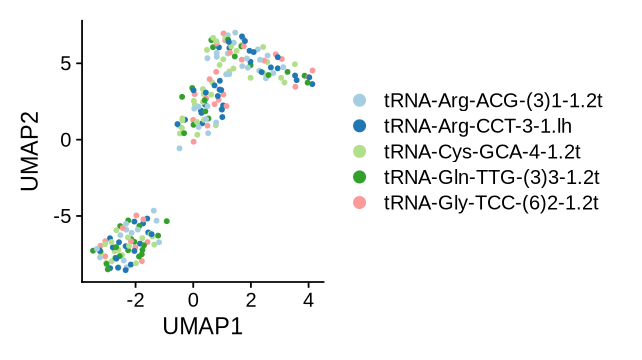

In [ ]:
wfix = 5.35
hfix = 3
options(repr.plot.width = wfix, repr.plot.height = hfix)
DimPlot(adata.R, reduction = 'umap', group.by = 'guide') + scale_color_brewer(palette = "Paired") + theme(plot.title = element_blank()) + xlab('UMAP1') + ylab('UMAP2') +
theme(margin(0,0,0,0, unit = "cm"), axis.text = element_text(family = "Helvetica"), axis.title = element_text(family = "Helvetica"), legend.text = element_text(family = "Helvetica"), legend.title = element_text(family = "Helvetica"))
#ggsave('~/projects/mir_tud/notebooks/cellcycle/tRF/tRF_cc_umap_sample_id.pdf', width = wfix, height = hfix)